# Importing the libraries

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Preprocessing

## Preprocessing the Training set

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,        
    shear_range=0.2,        
    zoom_range=0.2,         
    horizontal_flip=True   
)
training_set = train_datagen.flow_from_directory('train_flowers',target_size=(64, 64),batch_size=32,class_mode='categorical',shuffle=True               
)

Found 2198 images belonging to 5 classes.


## Preprocessing the Test set

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)  

test_set = test_datagen.flow_from_directory(
    'test_flowers',target_size=(64, 64),batch_size=32,class_mode='categorical',shuffle=False   
)

Found 548 images belonging to 5 classes.


# Building CNN

## Initialising the CNN

In [8]:
cnn = tf.keras.models.Sequential()

## Convolution

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

/Users/tejaskalyankar/tf_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Pooling

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Adding a second convolutional layer

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Flattening

In [12]:
cnn.add(tf.keras.layers.Flatten())

## Full Connection

In [13]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

## Output Layer

In [14]:
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

# Training the CNN

## Compiling the CNN

In [15]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Training the CNN on the Training set and evaluating it on the Test set

In [16]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

/Users/tejaskalyankar/tf_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.3308 - loss: 1.5118

/Users/tejaskalyankar/tf_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.3317 - loss: 1.5097 - val_accuracy: 0.4982 - val_loss: 1.2088
Epoch 2/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.4885 - loss: 1.1634 - val_accuracy: 0.5420 - val_loss: 1.1440
Epoch 3/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.5726 - loss: 1.0407 - val_accuracy: 0.5547 - val_loss: 1.0794
Epoch 4/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.6009 - loss: 0.9625 - val_accuracy: 0.5620 - val_loss: 1.1224
Epoch 5/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - accuracy: 0.6445 - loss: 0.8769 - val_accuracy: 0.6223 - val_loss: 0.9780
Epoch 6/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.6602 - loss: 0.8629 - val_accuracy: 0.6186 - val_loss: 0.9916
Epoch 7/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.6861 - loss: 0.7976 - val_accuracy: 0.6186 - val_loss: 1.0264
Epoch 8/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.6987 - loss: 0.7406 - val_accuracy: 0.6369 - val_loss: 

# Making a prediction

In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img('flower_prediction/download-7.jpg', target_size=(64, 64))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0
result = cnn.predict(test_image)
class_indices = training_set.class_indices  
class_labels = {v: k for k, v in class_indices.items()}
predicted_class_index = np.argmax(result)  
predicted_class = class_labels[predicted_class_index]
print(f"The predicted flower type is: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
The predicted flower type is: tulip


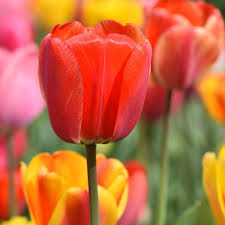